In [1]:
%matplotlib inline
from __future__ import print_function
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score

In [3]:
iris=load_iris()

In [4]:
X=iris.data
y=iris.target

In [5]:
knn=KNeighborsClassifier(n_neighbors=5)
scores=cross_val_score(knn,X,y,cv=10,scoring='accuracy')
print (scores)

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]


In [6]:
scores.mean()

0.96666666666666679

In [7]:
k_range=range(1,31)
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())
print (k_scores)

[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656, 0.95999999999999996, 0.96666666666666656, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


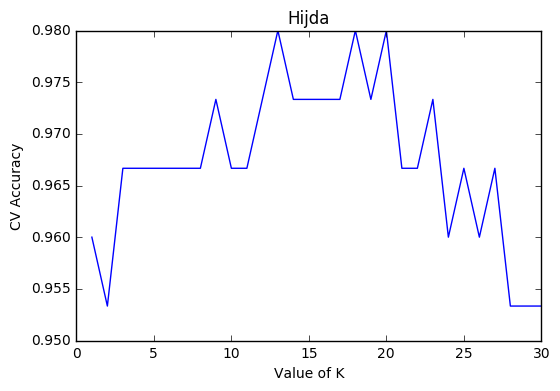

In [8]:
plt.plot(k_range,k_scores)
plt.xlabel('Value of K')
plt.ylabel('CV Accuracy')

In [9]:
from sklearn.grid_search import GridSearchCV

In [10]:
k_range=list(range(1,31))
print (k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [11]:
param_grid=dict(n_neighbors=k_range)
print (param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [12]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [13]:
grid.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [14]:
grid.grid_scores_

[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 7},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 8},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 9},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 10},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 11},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 12},
 mean: 0.98000, std: 0.03055, params: {'n_neighbors': 13},
 mean: 0.97333, std: 0.04422, params: {'n_neighbors': 14},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 15},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 16},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 17},
 mean:

In [15]:
print (grid.grid_scores_[0].parameters)
print (grid.grid_scores_[0].cv_validation_scores)
print (grid.grid_scores_[0].mean_validation_score)

{'n_neighbors': 1}
[ 1.          0.93333333  1.          0.93333333  0.86666667  1.
  0.86666667  1.          1.          1.        ]
0.96


In [16]:
grid_mean_scores=[result.mean_validation_score for result in grid.grid_scores_]
print (grid_mean_scores)

[0.95999999999999996, 0.95333333333333337, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.97333333333333338, 0.96666666666666667, 0.96666666666666667, 0.97333333333333338, 0.97999999999999998, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97999999999999998, 0.97333333333333338, 0.97999999999999998, 0.96666666666666667, 0.96666666666666667, 0.97333333333333338, 0.95999999999999996, 0.96666666666666667, 0.95999999999999996, 0.96666666666666667, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


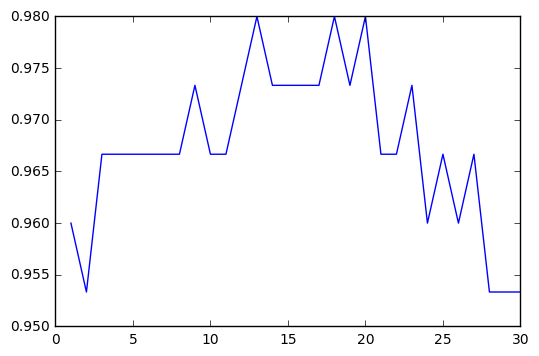

In [17]:
plt.plot(k_range,grid_mean_scores)

In [18]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.98
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')


In [19]:
k_range=list(range(1,31))
weight_options=['uniform','distance']

In [45]:
param_grid=dict(n_neighbors=k_range,weights=weight_options)
print (param_grid)

{'weights': ['uniform', 'distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [46]:
grid=GridSearchCV(knn,param_grid,cv=10,scoring='accuracy')
grid.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'weights': ['uniform', 'distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [47]:
grid.grid_scores_

[mean: 0.96000, std: 0.05333, params: {'weights': 'uniform', 'n_neighbors': 1},
 mean: 0.96000, std: 0.05333, params: {'weights': 'distance', 'n_neighbors': 1},
 mean: 0.95333, std: 0.05207, params: {'weights': 'uniform', 'n_neighbors': 2},
 mean: 0.96000, std: 0.05333, params: {'weights': 'distance', 'n_neighbors': 2},
 mean: 0.96667, std: 0.04472, params: {'weights': 'uniform', 'n_neighbors': 3},
 mean: 0.96667, std: 0.04472, params: {'weights': 'distance', 'n_neighbors': 3},
 mean: 0.96667, std: 0.04472, params: {'weights': 'uniform', 'n_neighbors': 4},
 mean: 0.96667, std: 0.04472, params: {'weights': 'distance', 'n_neighbors': 4},
 mean: 0.96667, std: 0.04472, params: {'weights': 'uniform', 'n_neighbors': 5},
 mean: 0.96667, std: 0.04472, params: {'weights': 'distance', 'n_neighbors': 5},
 mean: 0.96667, std: 0.04472, params: {'weights': 'uniform', 'n_neighbors': 6},
 mean: 0.96667, std: 0.04472, params: {'weights': 'distance', 'n_neighbors': 6},
 mean: 0.96667, std: 0.04472, para

In [49]:
print (grid.best_score_)
print (grid.best_params_)

0.98
{'weights': 'uniform', 'n_neighbors': 13}


In [50]:
knn=KNeighborsClassifier(n_neighbors=13,weights='uniform')
knn.fit(X,y)
knn.predict([3,5,4,2])

C:\Users\Akash Agte\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([1])

In [51]:
grid.predict([3,5,4,2])

C:\Users\Akash Agte\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([1])

In [52]:
from sklearn.grid_search import RandomizedSearchCV

In [53]:
param_dist=dict(n_neighbors=k_range,weights=weight_options)

In [55]:
rand=RandomizedSearchCV(knn,param_dist,cv=10,scoring='accuracy',n_iter=10,random_state=5)

In [56]:
rand.fit(X,y)
rand.grid_scores_

[mean: 0.97333, std: 0.03266, params: {'weights': 'distance', 'n_neighbors': 18},
 mean: 0.96667, std: 0.04472, params: {'weights': 'uniform', 'n_neighbors': 8},
 mean: 0.97333, std: 0.03266, params: {'weights': 'distance', 'n_neighbors': 24},
 mean: 0.98000, std: 0.03055, params: {'weights': 'uniform', 'n_neighbors': 20},
 mean: 0.95333, std: 0.04269, params: {'weights': 'uniform', 'n_neighbors': 28},
 mean: 0.97333, std: 0.03266, params: {'weights': 'uniform', 'n_neighbors': 9},
 mean: 0.96667, std: 0.04472, params: {'weights': 'distance', 'n_neighbors': 5},
 mean: 0.96667, std: 0.04472, params: {'weights': 'uniform', 'n_neighbors': 5},
 mean: 0.97333, std: 0.03266, params: {'weights': 'uniform', 'n_neighbors': 19},
 mean: 0.96667, std: 0.04472, params: {'weights': 'distance', 'n_neighbors': 20}]

In [58]:
print (rand.best_score_)
print (rand.best_params_)

0.98
{'weights': 'uniform', 'n_neighbors': 20}


In [65]:
best_scores=[]
for _ in range(20):
    rand=RandomizedSearchCV(knn,param_dist,cv=10,scoring='accuracy',n_iter=10)
    rand.fit(X,y)
    best_scores.append(round((rand.best_score_),3))
print (best_scores)

[0.97999999999999998, 0.97999999999999998, 0.97299999999999998, 0.97999999999999998, 0.97999999999999998, 0.97999999999999998, 0.97999999999999998, 0.97999999999999998, 0.97299999999999998, 0.97299999999999998, 0.97999999999999998, 0.97999999999999998, 0.97999999999999998, 0.97999999999999998, 0.97299999999999998, 0.97999999999999998, 0.97999999999999998, 0.97999999999999998, 0.97999999999999998, 0.97299999999999998]
